# Classification

A common task in computational research is to classify an object based on a set of features. In superivsed machine learning, we can give an algorithm a dataset of training examples that say "here are specific features, and this is the target class it belongs to". With enough training examples, a model can be built that recognizes important features in determining an objects class. This model can then be used to predict the class of an object given its known features.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

## 1) TelCo Dataset



We're going to load in the [telco customer dataset](https://www.kaggle.com/yeanzc/telco-customer-churn-ibm-dataset). Our goal here is to predict customer churn (whether or not customers leave a company's customer base) using information about the customers' behavior.

**Data Dictionary**

7043 observations with 20 variables

CustomerID: A unique ID that identifies each customer.

Gender: The customer’s gender: Male, Female.

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicate if the customer has a partner: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

tenure: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

In [2]:
churn = pd.read_csv("telco_churn.csv", index_col=[0])
churn.head()

,phoneservice,internetservice,onlinesecurity,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,tenure,monthlycharges
customerID,,,,,,,,,,,,
7590-VHVEG,No,DSL,No,No,No,No,Month-to-month,Yes,Electronic check,No,1,29.85
5575-GNVDE,Yes,DSL,Yes,No,No,No,One year,No,Mailed check,No,34,56.95
3668-QPYBK,Yes,DSL,Yes,No,No,No,Month-to-month,Yes,Mailed check,Yes,2,53.85
7795-CFOCW,No,DSL,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,45,42.30
9237-HQITU,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,2,70.70


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   phoneservice      7032 non-null   object 
 1   internetservice   7032 non-null   object 
 2   onlinesecurity    7032 non-null   object 
 3   techsupport       7032 non-null   object 
 4   streamingtv       7032 non-null   object 
 5   streamingmovies   7032 non-null   object 
 6   contract          7032 non-null   object 
 7   paperlessbilling  7032 non-null   object 
 8   paymentmethod     7032 non-null   object 
 9   churn             7032 non-null   object 
 10  tenure            7032 non-null   int64  
 11  monthlycharges    7032 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 714.2+ KB


We have 11 independent variables and one target variable: `Churn`.

Two of our independent variables are numeric, while the nine others are categorical.

Let's get to know our dataset by conducting some exploratory data analysis. We'll be using some rudimentary data analysis to see there's a relationship between the independent variables and churn.

In [4]:
churn.groupby("churn").mean()

,tenure,monthlycharges
churn,,
No,37.650010,61.307408
Yes,17.979133,74.441332


TBD

## 2) Logistic Regression

*explainer of logistic regression function*

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_logistic_thumb.png)

![](https://miro.medium.com/max/1400/1*aPgytc42C1btLtB3YbFTQA.jpeg)

![](https://online.stat.psu.edu/onlinecourses/sites/stat507/files/lesson09/graph_function.gif)

### Null accuracy

One of the first things you need to check in a classification project is the **null accuracy**.

This is defined as the proportion of the largest class in the target variable.

In [5]:
# Assign y variable
y = churn.churn

#Grab proporition
y.value_counts(normalize =True)

No     0.734215
Yes    0.265785
Name: churn, dtype: float64

- The largest class is `No` which makes up almost 3/4 of the data.
- The null accuracy is important because it serves as a benchmark for our model. 
- Let's say we were to train a "dummy" model that simply predicted "No" everytime because "No" is the largest class.
- That would mean we'd have a model that's correct 73.4% of the time without doing any actual model training.
- That would also mean that an actual trained model that produced a 75 or 76% accuracy wouldn't be that good of a model because it barely beats the "dummy" model.

Let's train a logistic regression model on the two quantitative variables: `monthlycharges` and `tenure`

In [6]:
#Select just the numerical columns
X_num =churn.select_dtypes("number")
X_num.head()

,tenure,monthlycharges
customerID,,
7590-VHVEG,1,29.85
5575-GNVDE,34,56.95
3668-QPYBK,2,53.85
7795-CFOCW,45,42.30
9237-HQITU,2,70.70


In [7]:
#Convert No -> 0 and Yes -> 1. Follows alphanumeric ordering
y = y.factorize()[0]

#Initialize model
lr = LogisticRegression()
#Fit on data
lr.fit(X_num, y)

LogisticRegression()

In [8]:
lr.score(X_num, y)

0.7842718998862344

/usr/local/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


Text(0, 0.5, 'Monthly Charges')

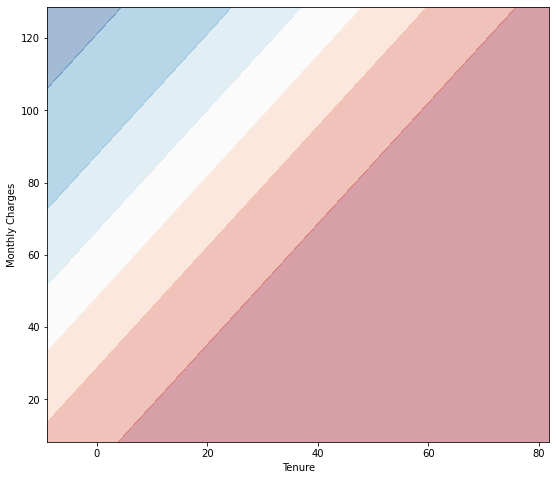

In [9]:
min1, max1 = X_num.iloc[:, 0].min()-10, X_num.iloc[:, 0].max()+10
min2, max2 = X_num.iloc[:, 1].min()-10, X_num.iloc[:, 1].max()+10
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = lr.predict_proba(grid)[:, 1]
zz = yhat.reshape(xx.shape)
plt.figure(figsize=(9, 8))
plt.contourf(xx, yy, zz, cmap='RdBu', alpha = .4)
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
# plt.scatter(X_num.tenure, X_num.monthlycharges, c= y, cmap="RdBu", alpha=.4)

### One-Hot-Encoding

Time to train a model using the categorical variables. We obviously cannot throw directly them into a model, we need to do a form of preprocessing called one-hot encoding that turns categorical data into numerical data.

One-hot-encoding creates `k` new variables for a single categorical variable with `k` categories (or levels), where each new variable is coded with a `1` for the observations that contain that category, and a `0` for each observation that doesn't. 

We're going to learn hot to create these variables with both pandas and sklearn.

Making dummy variables in pandas

In [10]:
#Pick PaymentMethod variable

pm = churn.paymentmethod
pm.head()

customerID
7590-VHVEG             Electronic check
5575-GNVDE                 Mailed check
3668-QPYBK                 Mailed check
7795-CFOCW    Bank transfer (automatic)
9237-HQITU             Electronic check
Name: paymentmethod, dtype: object

In [11]:
pm.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

`paymentmethod` has four unique variables which means we are going to create a dummy variable dataframe with four columns

In [12]:
pm_dummies = pd.get_dummies(pm, prefix="paymentmethod_")
pm_dummies.head()

,paymentmethod__Bank transfer (automatic),paymentmethod__Credit card (automatic),paymentmethod__Electronic check,paymentmethod__Mailed check
customerID,,,,
7590-VHVEG,0,0,1,0
5575-GNVDE,0,0,0,1
3668-QPYBK,0,0,0,1
7795-CFOCW,1,0,0,0
9237-HQITU,0,0,1,0


`pd.get_dummies` can be used on the entire dataset

In [13]:
#Grab categorical columns, referred to as object by pandas


o_cols = churn.select_dtypes("object").columns[:-1] # [:-1] is for excluding the target variable churn 
churn_dummies = pd.get_dummies(churn, columns=o_cols)
churn_dummies.head()

,churn,tenure,monthlycharges,phoneservice_No,phoneservice_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,No,1,29.85,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5575-GNVDE,No,34,56.95,0,1,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
3668-QPYBK,Yes,2,53.85,0,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
7795-CFOCW,No,45,42.30,1,0,1,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
9237-HQITU,Yes,2,70.70,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


**Dummy Variable Trap section**

The ["Dummy Variable Trap"](https://www.algosome.com/articles/dummy-variable-trap-regression.html) occurs when using One-Hot-Encoding on multiple categorical variables within the same set of features. This is because each set of one-hot-encoded variables can be added together across columns to create a single column of all `1`s, and so are multi-colinear when multiple one-hot-encoded variables exist within a given model.

To resolve this,we remove the first one-hot-encoded variable for each categorical variables, resulting in `k-1` so-called "Dummy Variables". 

In pandas we can address the dummy variable trap issue by setting `drop_first` to `True`

In [14]:
#Make dummy variables for phoneservice
pd.get_dummies(churn.phoneservice, prefix="phoneservice_", drop_first=True).head()

,phoneservice__Yes
customerID,
7590-VHVEG,0
5575-GNVDE,1
3668-QPYBK,1
7795-CFOCW,0
9237-HQITU,1


Remember it's unneccesary for each of the two categories in phoneservices to have each own's column.

Even though "No" isn't in the dataframe above, it's still represented in the data by virtue of the 0 value under the `phoneservice__Yes` column.

Repeat process for entire set of dummy variables

In [15]:
churn_dummies = pd.get_dummies(churn, columns=o_cols, drop_first=True)
churn_dummies.head()

,churn,tenure,monthlycharges,phoneservice_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_Yes,techsupport_Yes,streamingtv_Yes,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
customerID,,,,,,,,,,,,,,,,
7590-VHVEG,No,1,29.85,0,0,0,0,0,0,0,0,0,1,0,1,0
5575-GNVDE,No,34,56.95,1,0,0,1,0,0,0,1,0,0,0,0,1
3668-QPYBK,Yes,2,53.85,1,0,0,1,0,0,0,0,0,1,0,0,1
7795-CFOCW,No,45,42.30,0,0,0,1,1,0,0,1,0,0,0,0,0
9237-HQITU,Yes,2,70.70,1,1,0,0,0,0,0,0,0,1,0,1,0


In [16]:
#Number of features is reduced from 25 to 16
churn_dummies.shape

(7032, 16)

### Sci-kit Learn way

Initialize the one hot encoder object. 

Set drop = 'first' to avoid dummy variable trap.

In [27]:

ohe = OneHotEncoder(categories='auto', handle_unknown='ignore', sparse=False, drop="first")

In [25]:
#Fit transform on the paymentmethod variable
pm = churn[["paymentmethod"]]
pm_ohe = ohe.fit_transform(pm)
pm_ohe.shape

(7032, 3)

In [54]:
#Fit transform on the object columns variable
o_cols = churn.drop("churn", axis = 1).select_dtypes("object")

churn_ohe = ohe.fit_transform(o_cols)
churn_ohe.shape

(7032, 13)

In [55]:
#Make it dataframe
churn_ohe = pd.DataFrame(index=churn.index, data=churn_ohe, columns=ohe.get_feature_names_out())

Our fully one-hotencoded dataset

In [52]:
cp_ohe.head()

,phoneservice_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_Yes,techsupport_Yes,streamingtv_Yes,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
customerID,,,,,,,,,,,,,
7590-VHVEG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5575-GNVDE,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3668-QPYBK,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7795-CFOCW,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9237-HQITU,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


Now let's join this with numerical data

In [56]:
#Concatenate X_num and with churn_ohe.
#Set axis = 1 to do a side by side concatenation
X = pd.concat([X_num, churn_ohe], axis = 1)
X.head()

,tenure,monthlycharges,phoneservice_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_Yes,techsupport_Yes,streamingtv_Yes,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
customerID,,,,,,,,,,,,,,,
7590-VHVEG,1,29.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5575-GNVDE,34,56.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3668-QPYBK,2,53.85,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7795-CFOCW,45,42.30,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9237-HQITU,2,70.70,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


**Now we are ready to do some modeling**

### Modeling with Logistic Regression

Before we train our model we have to do a train test split.

- We use test size of 25%
- Set stratify = y to produce the same class proportions in both datasets

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, stratify=y)

1. Initialize Model
2. Fit model on training data
3. Evaluate on training and testing datasets

In [66]:
lr = LogisticRegression(max_iter=170)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=170)

In [68]:
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print("Training score = {}, testing score = {}".format(train_score.round(3), test_score.round(3)))

Training score = 0.801, testing score = 0.796


**How well did we do? Is the model overfit?**

However, we've only done a single train test split, there could be bias in how we split the data so we need to execute multiple splits and trainings to make sure our results are representative of what we're trying to model.

This is referred to as kfold cross-validation.

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [73]:
#Initialize KFold object with
kf = KFold(n_splits=5)

#Run cross_val_score function
cv_results = cross_val_score(LogisticRegression(max_iter=400), X, y, cv=kf, scoring="accuracy")
cv_results


array([0.80454869, 0.80597015, 0.78733997, 0.79943101, 0.79587482])

In [74]:
cv_results.mean()

0.7986329276195734

**What does this tell us about the performance of our model?**

#### Model Interpretation

Let's look at the coefficients to understand what affects churn.

In [76]:
#Retrain model

lr = LogisticRegression(max_iter=300)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [77]:
#Here's how to grab the coefficients
lr.coef_

array([[-0.0347908 ,  0.0116307 , -0.73894356,  0.7720783 , -0.45714621,
        -0.51714049, -0.40791314,  0.17570986,  0.16155972, -0.61298527,
        -1.40785882,  0.31363198, -0.13243874,  0.27508683, -0.13094531]])

Organize the coefficients and feature names into a pandas series

In [79]:
coef = pd.Series(index= X.columns, data=lr.coef_[0])

In [81]:
#Sort coef from least to greatest
coef.sort_values()

contract_Two year                       -1.407859
phoneservice_Yes                        -0.738944
contract_One year                       -0.612985
onlinesecurity_Yes                      -0.517140
internetservice_No                      -0.457146
techsupport_Yes                         -0.407913
paymentmethod_Credit card (automatic)   -0.132439
paymentmethod_Mailed check              -0.130945
tenure                                  -0.034791
monthlycharges                           0.011631
streamingmovies_Yes                      0.161560
streamingtv_Yes                          0.175710
paymentmethod_Electronic check           0.275087
paperlessbilling_Yes                     0.313632
internetservice_Fiber optic              0.772078
dtype: float64

Observations:

- A two year contract is the feature most associated not churning.
- Having fiber optic internet is the feature most associated with churning.

#### Model evaluation

We've covered accuracy already but there a whole litany of other ways to evaluate the performance of a classification model.

$$ Accuracy= \frac{\sum{\text{True Positives}}+\sum{\text{True Negatives}}}{\sum{\text{Total Population}}}$$

#### Confusion Matrix


<img src='https://www.dataschool.io/content/images/2015/01/confusion_matrix2.png' width=500>



[Confusion Matrix (Wikipedia)](https://en.wikipedia.org/wiki/Confusion_matrix): 
- true positive (TP): A test result that correctly indicates the presence of a condition or characteristic
- true negative (TN): A test result that correctly indicates the absence of a condition or characteristic
- false positive (FP): A test result which wrongly indicates that a particular condition or attribute is present
- false negative (FN): A test result which wrongly indicates that a particular condition or attribute is absent

### Challenge

Write down what are TP, TN, FP, and FN of the telco churn dataset

Answer:
    
- TP are customers who churn that the model predicted to churn.
- TN are customers who did not churn that the model predicted to not churn.
- FP are customers who did not churn that the model predicted to churn.
- FN are customers who did churn that the model predicted to not churn.


1. **Precision**: 
$$\frac{\sum{\text{True Positives}}}{\sum{\text{Predicted Positives}}}$$
2. **Recall** (or **Sensitivity**): 
$$\frac{\sum{\text{True Positives}}}{\sum{\text{Condition Positives}}}$$ 
3. **Specificity** (like recall for negative examples): 
$$\frac{\sum{\text{True Negatives}}}{\sum{\text{Condition Negatives}}}$$




<img src='https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg' width=400, height = 300>

Let's make a confusion matrix and derive the recall and precision scores.

First let's make predictions from the test dataset

In [82]:
preds = lr.predict(X_test)

In [83]:
#Pass y_test and preds into confusion_matrix

confusion_matrix(y_test, preds)

array([[1159,  132],
       [ 227,  240]])

How many TP, TN, FN, and FP are there?

Recall score

In [84]:
recall_score(y_test, preds)

0.5139186295503212

Precision score

In [85]:
precision_score(y_test, preds)

0.6451612903225806

**Which score is more important in this scenario?**


**Imagine a model that produced scores that were switched, which model is the better one?**

#### F1 Score

![](https://images.deepai.org/glossary-terms/b9c8dec8549a4201ae358483cc6bdfa6/fscore.jpg)

In [87]:
f1_score(y_test, preds)

0.5721096543504172

## 2) Decision Trees

![](https://static01.nyt.com/images/2008/04/16/us/0416-nat-subOBAMA.jpg)

#### Sci-kit learn decision tree example

![](https://www.kdnuggets.com/wp-content/uploads/dt-iris-interpretability.jpg)

*Explanation of decision trees. Going into detail about how thresholds are determined and how predictions are made*

**Parameters**

criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

splitter: The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split: The minimum number of samples required to split an internal node

min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

max_features: The number of features to consider when looking for the best split

Now let's train a decision tree model on the TelCo Churn dataset.

We are going to initialize a default DT model, meaning we're not going to pass in any parameters of our own.

And like we did before, we are going to fit a model and then evaluate it on the training and testing datasets

In [99]:
#Initialize model
dt = DecisionTreeClassifier()

#Fit model on the dataset
dt.fit(X_train, y_train)

#Derive the training accuracy score
dt.score(X_train, y_train)

0.9945013272658324

**Woohoo we got near perfect model!!!**

Or did we......??? (Hint: we didn't)

In [102]:
#testing score
dt.score(X_test, y_test)

0.7252559726962458

Our testing score is considerably lower. 

Remember the point of a machine learning model is to keep a machine learning model. We want to be confident that when we apply our model in the real world it will do a decent job of evaluating data it has not seen before.

Now let's try a model in which we impose a `max_depth` in order to prune the tree. 

In [108]:
#Initialize
dt = DecisionTreeClassifier(max_depth =5)
# Fit 
dt.fit(X_train, y_train)

train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)

print("Our training score is {} and our testing score is {}".format(train_score.round(3), test_score.round(3)))

Our training score is 0.8 and our testing score is 0.782


The gap between the two scores is considerably lower. We arguably don't have an overfit model anymore.

Let's see how min_samples_leaf impacts the overfitness of the model

In [119]:
X.columns

Index(['tenure', 'monthlycharges', 'phoneservice_Yes',
       'internetservice_Fiber optic', 'internetservice_No',
       'onlinesecurity_Yes', 'techsupport_Yes', 'streamingtv_Yes',
       'streamingmovies_Yes', 'contract_One year', 'contract_Two year',
       'paperlessbilling_Yes', 'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check'],
      dtype='object')

In [114]:
#Initialize
dt = DecisionTreeClassifier(min_samples_leaf = 20)
# Fit 
dt.fit(X_train, y_train)

train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)

print("Our training score is {} and our testing score is {}".format(train_score.round(3), test_score.round(3)))

Our training score is 0.824 and our testing score is 0.786


### Tree Visualization

We are going to visualize the actual decision tree.


Let's retrain it with a small `max_depth` 

In [158]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

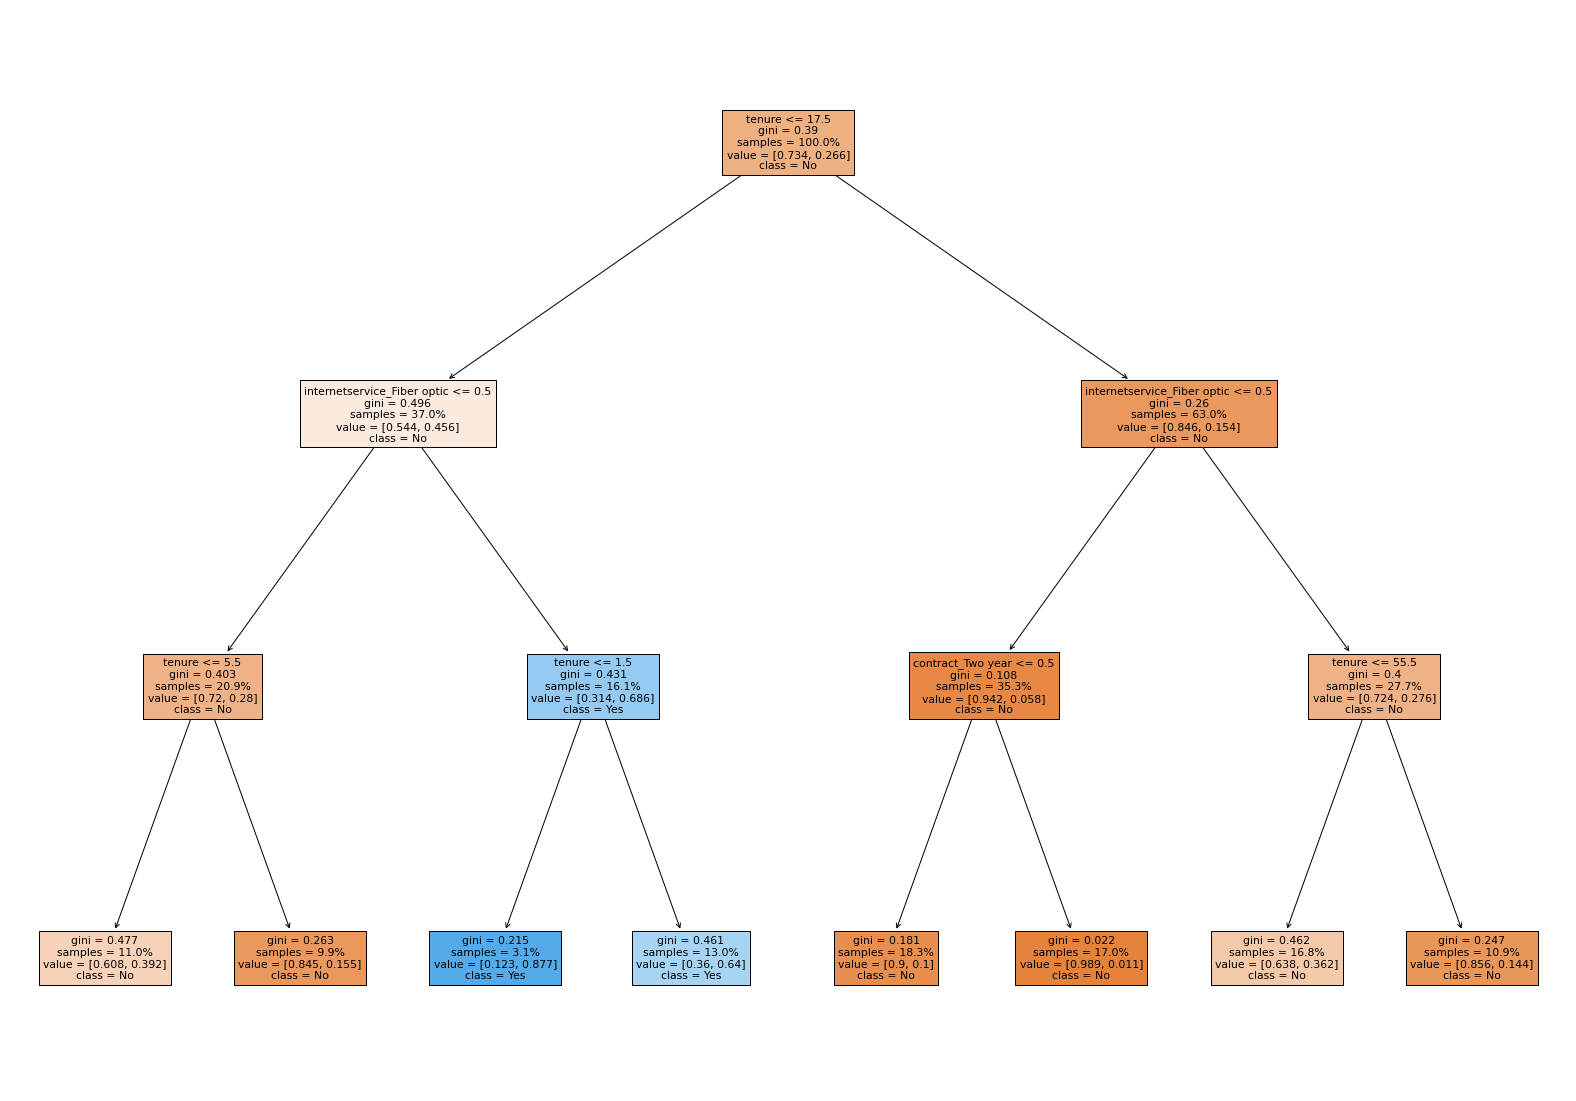

In [160]:
plt.figure(figsize=(28, 20))
plot_tree(dt, feature_names=X.columns, class_names=["No", "Yes"], 
          filled = True, proportion=True, 
#           max_depth=3
         );

**What does the tree tell us about patterns in the data**

Using the tree, how would we make predictions about the following customers?


    - Customer A: Been a customer for 20 months, does have fiber optic internet and is on a two year contract.
    - Customer B: Been a customer for 10 months and has fiber optic internet